In [33]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [57]:
from keras import models 
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))


위까지는 신경망의 구조
### Dense?

### Dense(8, input_dim=4, init='uniform', activation='relu'))

첫번째 인자 : 출력 뉴런의 수를 설정합니다.
input_dim : 입력 뉴런의 수를 설정합니다.
init : 가중치 초기화 방법 설정합니다.
‘uniform’ : 균일 분포
‘normal’ : 가우시안 분포
activation : 활성화 함수 설정합니다.
‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.


In [36]:
# 컴파일 단계
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

#옵티마이저 : 입력된 테이터와 손실함수를 기반으로 네트워크를 업데이트 하는 메커니즘이다.
#손실함수 : 훈련 데이터에서 신경망의 성능을 측정하ㅡㄴ 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와줍니다.
#훈련과 테스트를 과정을 모니터링할 지표 : 여기서는 정확도(정확히는 분류된 이미지의 비율)만 고려


In [37]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

# 훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정한다.
# unit8 -> float32 로 배열크기 변환

In [38]:
train_images.shape

(60000, 784)

In [39]:
# 레이블 범주형으로 인코딩 하기 (3장에서 알아봄)
# label 준비하기
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# to_categorical : Converts a class vector (integers) to binary class matrix.

In [40]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [41]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

W0814 14:12:03.638781  9916 deprecation.py:323] From D:\user\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0814 14:12:03.785346  9916 deprecation_wrapper.py:119] From D:\user\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.2524 - acc: 0.9277
Epoch 2/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.1030 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0673 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0494 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.0372 - acc: 0.9888


In [44]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 62us/step


In [45]:
print(test_loss,test_acc)

0.06265003333110362 0.9822


In [49]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [52]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

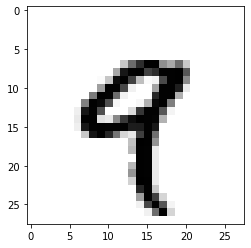

In [59]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# 넘파이로 텐서 조작하기 
\